In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('Aren.csv', na_values='?')

In [3]:
data

,Month;Monthly Kopi Susu Gula Aren Prediction
0,01/05/2021;23
1,01/06/2021;63
2,01/07/2021;35
3,01/08/2021;27
4,01/09/2021;42
5,01/10/2021;81
6,01/11/2021;90
7,01/12/2021;79
8,01/01/2022;83
9,01/02/2022;45


In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [5]:
train_data = data.loc['01/05/2021':'01/01/2023']
test_data = data.loc['01/02/2023':]

In [6]:
train_data

,Month;Monthly Kopi Susu Gula Aren Prediction


In [7]:
test_data

,Month;Monthly Kopi Susu Gula Aren Prediction
1,01/06/2021;63
2,01/07/2021;35
3,01/08/2021;27
4,01/09/2021;42
5,01/10/2021;81
6,01/11/2021;90
7,01/12/2021;79
8,01/01/2022;83
9,01/02/2022;45
10,01/03/2022;85


In [8]:
#pembutan fungsi untuk stationary test
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [9]:
#stationary test
test_adf(data['Monthly Kopi Susu Gula Aren Prediction'], 'Monthly Kopi Susu Gula Aren Prediction')

KeyError: 'Monthly Kopi Susu Gula Aren Prediction'

ValueError: could not convert string to float: '01/05/2021'

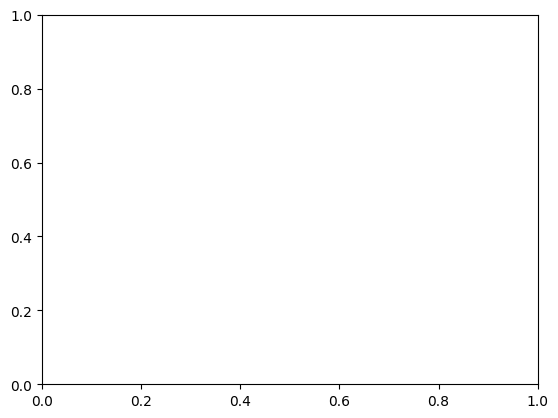

In [ ]:

acf_plot = plot_acf(data, lags=7)
pacf_plot = plot_pacf(data, lags=7)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(data['Monthly Kopi Susu Gula Aren Prediction'])

In [ ]:
test_statistic = result[0]
p_value = result[1]
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -4.526938022606159
p-value: 0.00017573742471421356


In [ ]:
if p_value < 0.05:
    print("Data is stationary (reject the null hypothesis)")
else:
    print("Data is non-stationary (fail to reject the null hypothesis)")

Data is stationary (reject the null hypothesis)


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
lag_acf = acf(data, nlags=7)
lag_pacf = pacf(data, nlags=7, method='ols')

ValueError: could not convert string to float: '01/05/2021'

In [ ]:
plt.stem(range(1, len(lag_acf)), lag_acf[1:])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()


NameError: name 'lag_acf' is not defined

In [ ]:
plt.stem(range(1, len(lag_pacf)), lag_pacf[1:])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()

NameError: name 'lag_pacf' is not defined

In [ ]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Identify the appropriate order of differencing (d) and parameters (p, q)
d = 0  # order of differencing
p = 0  # AR order
q = 0  # MA order

In [ ]:
best_aic = float("inf")
best_model = None

for d_val in range(0, 2):
    for p_val in range(0, 3):
        for q_val in range(0, 3):
            try:
                model = sm.tsa.ARIMA(data, order=(p_val, d_val, q_val))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = model
                    d = d_val
                    p = p_val
                    q = q_val
            except:
                continue

In [ ]:
import statsmodels.api as sm


In [ ]:
data['Monthly Kopi Susu Gula Aren Prediction'] = data['Monthly Kopi Susu Gula Aren Prediction'].astype(float)


In [ ]:
final_model = sm.tsa.ARIMA(data, order=(p, d, q))
final_results = final_model.fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
print("Best Model:")
print(f"Order: ({p}, {d}, {q})")
print("AIC:", best_aic)

Best Model:
Order: (0, 0, 0)
AIC: inf


In [ ]:
model = sm.tsa.ARIMA(train_data, order=(p, d, q))
results = model.fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
p = 5
d = 0
q = 4

In [ ]:
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
start_index = len(train_data)
end_index = len(train_data) + len(test_data) + 16

In [ ]:
predictions = model_fit.predict(start=start_index, end=end_index)


NameError: name 'model_fit' is not defined

In [ ]:
print("Hasil Prediksi:")
print(predictions)

Hasil Prediksi:


NameError: name 'predictions' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(train_data, predictions)
rmse = mean_squared_error(train_data, predictions, squared=False)
mae = mean_absolute_error(train_data, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 397.43664643954867
Root Mean Squared Error (RMSE): 19.93581316223516
Mean Absolute Error (MAE): 17.343769630829094


In [ ]:
!python --version

Python 3.10.12


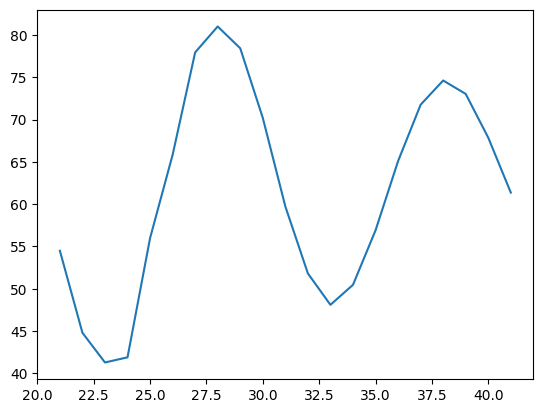

In [ ]:
plt.plot(predictions.index, predictions, label='Hasil Prediksi')


In [ ]:
predictions = predictions[:len(test_data)]

In [ ]:
predictions

21    54.488513
22    44.789332
23    41.277099
24    41.887819
Name: predicted_mean, dtype: float64

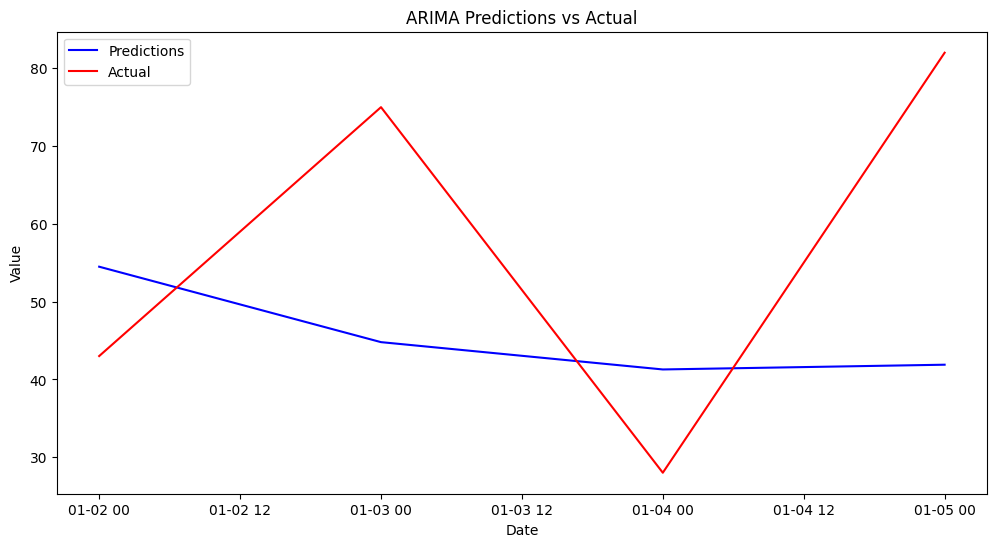

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, predictions, color='blue', label='Predictions')
plt.plot(test_data.index, test_data, color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions vs Actual')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(predictions, open("/content/gdrive/MyDrive/TA/model2.pkl", 'wb'))